# Classification of Galaxies According to their Structure(Morphology) using the Galaxy Zoo Project Dataset

## Background

Galaxy classification is fandamental when investigating properties of galaxies in statistical analysis in order to understand their evolution prosess. The galaxies are classified following the Hubble classifications as either spirals, ellipticals or irregulars if they do not fit in any of the previous classifications. Traditionally, galaxies are classified by visualy inspecting galaxy images. With the increase in the number of observed samples, visual classification is not only time consuming or labour intensive, but nearly imposible to classify large galaxy samples. Their is a need to automate the classifications that can replace the visual classifications with high accuracy . 

The Galaxy Zoo Project 2 classfied around 200,000 galaxy images obtained from the Sloan Digital Sky Survey (SDSS), DR7 and other similar surveys. The images are classified into respective categories (37) following a set of 11 questions with the help of the public (citizen scientist).

The project will use the Galaxy Zoo dataset from kaggle consisting of 61,578 galaxy images in the training dataset and 79,973 images for the test dataset.

### Overview

The main aim of this project is to build a model that can automate the galaxy classification in to two main categories (spirals and ellipticals) with very high accuracy.

This notebook contain the following sections,
- Data Exploration
- Selection Method
- Data Preprocessing
- Methodology
- Model Training 
- Model Visualization
- Conclusions and Recommendations



## Exploring and Understanding the Dataset

While the traing dataset contain 61,578 images, the training_solution_rev1.csv file has the information regarding the probablities of a galaxies belonging to the respective classes. From the 37 classes, the main categories of interest are classes 1.1 and 1.2. Based on the first classification question, class 1.1 give the probability of a galaxy being smooth (elliptical) and class 1.2 gives the probability of it having features or disk(spirals). 

For a more clean sample, we will use the images classified with a more than 0.8 probability as belonging to the two classes and labeling then appropriatly. Out of all the traing dataset images, only 24,273 satisfied our requement (>= 0.8 probability in either class 1.1 or 1.2). We separated the data that satisfied our requarements into a new dataframe. When inspecting the new dataframe, no duplicates or missing values were found.


In [91]:
#importing required libraries for data exploration
import pandas as pd
import numpy as np

In [92]:
#reading the training csv file and displaying the first 5 row 
#to have a better understanding of the classes
data = pd.read_csv("../input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip",
                   compression="zip")

#data = pd.read_csv('training_solutions_rev1.csv')
data.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [93]:
# data = pd.read_csv("/kaggle/input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip",
#                    compression="zip")


In [94]:
#looking for the number of rows and colunm in the dataframe
data.shape

(61578, 38)

We define a fuction that will be used to add the image type extection to the GalaxyID. Since our images are 'jpg', we will use this extection in the defined fuction. The function is then used to add the extection on the dataframe colunm GalaxyID.

In [95]:
#definig a function to add image extections to the GalaxyID
#adding the image extections to the GalaxyID

def append_ext(filename):
    """ Appends `.jpg` file extension to a filename """
    return f"{filename}.jpg"
    #return filename + '.jpg'

#applying the function to the GalaxyID colunm
data["GalaxyID"] = data["GalaxyID"].apply(append_ext)

#printing the first five row of the dataframe to view the changes
data.head(5)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008.jpg,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023.jpg,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053.jpg,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078.jpg,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [96]:
#creating a new dataframe with galaxies having a probability of 0.8 in either class1.1 
#or class1.2
new_data = data[((data["Class1.1"] >= .8) | (data["Class1.2"] >= .8))].reset_index(drop=True)
print(new_data.shape)
new_data.head(5)

(24273, 38)


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,100134.jpg,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.00000,0.054649,0.081974,0.081974,0.327894
2,100237.jpg,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.000000,0.208685,0.179056,0.000000,0.032728,0.14098,0.000000,0.000000,0.089185,0.124848
3,100263.jpg,0.179654,0.818530,0.001816,0.573791,0.244739,0.047326,0.197413,0.016623,0.228116,...,0.141605,0.000000,0.007855,0.008768,0.000000,0.00000,0.000000,0.000000,0.000000,0.016623
4,100322.jpg,0.091987,0.908013,0.000000,0.816806,0.091207,0.000000,0.091207,0.000000,0.091207,...,0.142815,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [97]:
#looking for duplicate data
new_data.drop_duplicates(inplace=True)
new_data.shape

#the are no duplicate images in the dataset


(24273, 38)

In [98]:
#inspecting missing data
new_data.isnull().sum().sum()

0

In [99]:
#adding a new colunm with labels for the galaxies with probability greater than 0.8.
#we label those in class1.1 as ellipticals and those in class1.2 as spirals

#define conditions
conditions = [new_data["Class1.1"] >= 0.8, 
              new_data["Class1.2"] >= 0.8]

#define choices
choices = ["elliptical", "spiral"]

#create new column in DataFrame that displays results of comparisons
new_data["class"] = np.select(conditions, choices, default="Tie")

new_data

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,class
0,100090.jpg,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,elliptical
1,100134.jpg,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894,spiral
2,100237.jpg,0.164391,0.800759,0.034850,0.030795,0.769964,0.149037,0.620928,0.387742,0.382223,...,0.208685,0.179056,0.000000,0.032728,0.140980,0.000000,0.000000,0.089185,0.124848,spiral
3,100263.jpg,0.179654,0.818530,0.001816,0.573791,0.244739,0.047326,0.197413,0.016623,0.228116,...,0.000000,0.007855,0.008768,0.000000,0.000000,0.000000,0.000000,0.000000,0.016623,spiral
4,100322.jpg,0.091987,0.908013,0.000000,0.816806,0.091207,0.000000,0.091207,0.000000,0.091207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,spiral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24268,999786.jpg,0.800415,0.165614,0.033971,0.000000,0.165614,0.044163,0.121451,0.089182,0.076432,...,0.044591,0.044591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089182,elliptical
24269,999795.jpg,0.129878,0.867781,0.002341,0.066500,0.801281,0.598990,0.202291,0.550301,0.250981,...,0.249742,0.172674,0.127884,0.142373,0.048823,0.038712,0.000000,0.123529,0.196864,spiral
24270,999875.jpg,0.020285,0.979715,0.000000,0.207551,0.772164,0.315305,0.456860,0.722483,0.049681,...,0.074294,0.029641,0.618548,0.027295,0.638331,0.000000,0.000000,0.000000,0.056857,spiral
24271,999950.jpg,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,elliptical


In [100]:
#Exploring the distributing of the new dataframe
print(new_data[new_data["class"] == "elliptical"].shape)

print(new_data[new_data["class"] == "spiral"].shape)

(8132, 39)
(16141, 39)


## Selection Method
From the new dataframe with elliptical and spiral labels (24,273), we have 8,132 elliptical galaxy images and 16,141 spirals. Since our main interest is on the model accuracy, it is important to balance the number of sample used from both classes to prevent the model from learning to classify only one class. To balance the training dataset, we selected 8000 random samples from each of the two categories. However we first copied a small sample of our data, 500 images from each of the two class, to a new folder for visual inspection. This sample was later manually cropped and used for the Minimum Valuable Product (MVP).

We at some point considered the inclusion of a few antifacts to improve model traing in identifing what is not a spiral or elliptical galaxy. The antifacts category corresponds to Class 1.3. However, this was not included in the final product.

In [101]:
#sort the main data by class 1.3 (artifacts/stars)
data.sort_values("Class1.3", 
                 ascending=False,
                 inplace=True)
data.head(10)

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
17392,356310.jpg,0.064853,0.000000,0.935147,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16618,345209.jpg,0.123542,0.000000,0.876458,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58526,955102.jpg,0.172172,0.034034,0.793794,0.034034,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1791,126783.jpg,0.178000,0.044000,0.778000,0.022000,0.022000,0.000000,0.022000,0.0,0.022000,...,0.022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61345,996629.jpg,0.290021,0.000000,0.709979,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28337,515600.jpg,0.227000,0.068000,0.705000,0.022644,0.045356,0.022678,0.022678,0.0,0.045356,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46887,783039.jpg,0.279000,0.023000,0.698000,0.000000,0.023000,0.000000,0.023000,0.0,0.023000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36732,636777.jpg,0.274000,0.042000,0.684000,0.000000,0.042000,0.000000,0.042000,0.0,0.042000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23081,437063.jpg,0.319300,0.000000,0.680700,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58550,955433.jpg,0.260000,0.060000,0.680000,0.000000,0.060000,0.000000,0.060000,0.0,0.060000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Stars/Artifacts classifed with a percentage fraction of 0.8 are only 2. Those with a percentage fraction of 0.6 are 24 and 44 have a fraction of 0.5. It would have been important to visually inspect this subset of objects to ensure they a trully antifacts and will not mislead the model.

In [102]:
#printing out samples of antifacts based on specified selections

data[data["Class1.3"] >= .8 ].shape #only 2
# data[data["Class1.3"] >= .6 ].shape # 24
# data[data["Class1.3"] >= .5 ].shape #44

(2, 38)

In [103]:
#dataframe for the artifacts/stars
df_antifacts = data[data["Class1.3"] >= .5 ]
df_antifacts.shape

(44, 38)

## Data Preprocessing

Since our model was to mainly classify the spirals and the elliptical galaxy images, we procceded with the selection and preprocessing stage in preparation for model training. For the MVP, only 1000 galaxy samples were selected (500 for both the spiral and elliptical galaxaies). We copied the images into a folder in the local machine for visual verification and cropping with the code below.

For the final product a total of 16,000 images were randomly selected as a subset of the filtered data.

In [104]:
# randomly selecting 500 samples in each category for the mvp and 
# saving it in to a new dataframe
df_spiral_new = new_data[new_data["class"] == "spiral"].sample(n=500)
print("This is a sample of spiral galaxies")
print(df_spiral_new.head(5))
print(df_spiral_new.shape)

df_elliptical_new =new_data[new_data["class"] == "elliptical"].sample(n=500)
print("And this is a sample of elliptical galaxies")
print(df_elliptical_new.head(5))
print(df_elliptical_new.shape)

This is a sample of spiral galaxies
         GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
4223   264045.jpg  0.121824  0.863878  0.014299  0.000000  0.863878  0.000000   
8411   415291.jpg  0.125166  0.843500  0.031334  0.216185  0.627315  0.433103   
16510  712607.jpg  0.135735  0.832894  0.031372  0.025407  0.807487  0.495177   
18319  777003.jpg  0.040111  0.959889  0.000000  0.124738  0.835151  0.094152   
11932  547599.jpg  0.158883  0.834601  0.006515  0.000000  0.834601  0.629772   

       Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
4223   0.863878  0.427915  0.435963  ...   0.240682   0.094092   0.093141   
8411   0.194212  0.318107  0.309209  ...   0.000000   0.278574   0.039533   
16510  0.312310  0.665398  0.142089  ...   0.087506   0.407779   0.170113   
18319  0.741000  0.711496  0.123655  ...   0.366808   0.291767   0.052921   
11932  0.204829  0.570868  0.263733  ...   0.423989   0.088793   0.058085   

       Class11

In [158]:
frames_test = [df_spiral_new, df_elliptical_new]
df_galaxies_test = pd.concat(frames_test)
df_galaxies_test = df_galaxies_test[["GalaxyID", "class"]]
df_galaxies_test.head(5)

,GalaxyID,class
4223,264045.jpg,spiral
8411,415291.jpg,spiral
16510,712607.jpg,spiral
18319,777003.jpg,spiral
11932,547599.jpg,spiral


The cell below was previously used to copy images based on a dataframe into diffent folders for the mvp model training. We created new directories for the defferent categories, defined the source and destination directories and finally looped over your desired files from the dataframe and copying the content of the source directiry to the desired destination.

In [105]:
# # importing shutil module
# import os
# from shutil import copyfile

# #creating new directories for the defferent categories
# os. mkdir("/home/marcelina/Desktop/DSI/project/data/spirals") 
# os. mkdir("/home/marcelina/Desktop/DSI/project/data/ellipticals") 

# # define your source and destination directories
# #spriral
# source_directory1 = "/home/marcelina/Desktop/DSI/project/images_training_rev1"
# destination_directory1 = "/home/marcelina/Desktop/DSI/project/data/spirals"
# #elliptical
# # source_directory2 = "/home/marcelina/Desktop/DSI/project/images_training_rev1"
# destination_directory2 = "/home/marcelina/Desktop/DSI/project/data/ellipticals"


# # loop over your desired files from the dataframe to copy them
# # Copy the content of source to destination
# for fileName in df_spiral_new["GalaxyID"]: 
#     source_file1 = source_directory1 + "/" + fileName 
#     destination_file1 = destination_directory1 + "/" + fileName
#     #copyfile(source_file1, destination_file1)


# for fileName in df_elliptical_new["GalaxyID"]: 
#     source_file2 = source_directory2 + "/" + fileName 
#     destination_file2 = destination_directory2 + "/" + fileName
#     #copyfile(source_file2, destination_file2)


### Preprocessing for the final product

In [106]:
# selecting equal number of spiral
# and elliptical galaxies
# randomly selecting 8,000 samples in each categiry
df_spiral = new_data[new_data["class"] == "spiral"].sample(n=8000,random_state = 42)
print("This is a sample of spiral galaxies")
print(df_spiral.head(5))
print(df_spiral.shape)

df_elliptical =new_data[new_data["class"] == "elliptical"].sample(n=8000,random_state = 42)
print("And this is a sample of elliptical galaxies")
print(df_elliptical.head(5))
print(df_elliptical.shape)

This is a sample of spiral galaxies
         GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
20666  863568.jpg  0.055449  0.944551  0.000000  0.894966  0.049585  0.000000   
17422  745024.jpg  0.170517  0.829483  0.000000  0.593576  0.235907  0.000000   
23878  985580.jpg  0.096710  0.903290  0.000000  0.903290  0.000000  0.000000   
15765  684719.jpg  0.048381  0.951619  0.000000  0.034938  0.916681  0.287033   
6305   340999.jpg  0.074525  0.897899  0.027576  0.000000  0.897899  0.441543   

       Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
20666  0.049585  0.000000  0.049585  ...   0.000000   0.000000   0.000000   
17422  0.235907  0.000000  0.235907  ...   0.000000   0.000000   0.000000   
23878  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   
15765  0.629648  0.790393  0.126288  ...   0.188969   0.427433   0.173989   
6305   0.456356  0.806458  0.091441  ...   0.142079   0.522301   0.142079   

       Class11

In [107]:
#merging the two dataframes together to make the traing dataframe
#sellecting only the galaxyid and classes columns
frames = [df_spiral, df_elliptical]
df_galaxies = pd.concat(frames)
df_galaxies = df_galaxies[["GalaxyID", "class"]]
df_galaxies.head(5)

,GalaxyID,class
20666,863568.jpg,spiral
17422,745024.jpg,spiral
23878,985580.jpg,spiral
15765,684719.jpg,spiral
6305,340999.jpg,spiral


In [108]:
# printing the shape of the final dataframe
df_galaxies.shape

(16000, 2)

In [110]:
#unziping the test image folder
import zipfile
with zipfile.ZipFile("../input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [111]:
#unziping the test image folder
import zipfile
with zipfile.ZipFile("/kaggle/input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip", 'r') as zip_ref:
    zip_ref.extractall()

''

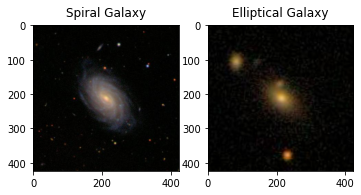

In [112]:
# visualing one of the images and the image size
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

#images
img= image.load_img("./images_training_rev1/104934.jpg")
img2 = image.load_img("./images_training_rev1/582003.jpg")

#Subplots
plt.figure(figsize=(12,4.5))
plt.subplot(141)
plt.imshow(img)
plt.title("Spiral Galaxy", y=1.02, fontsize=12)

plt.subplot(142)
plt.imshow(img2)
plt.title("Elliptical Galaxy", y=1.02, fontsize=12)

;

In [113]:
import cv2

print("The images are of size: ")
cv2.imread("./images_training_rev1/104934.jpg").shape

#the images have the shape 424,424,3

The images are of size: 


(424, 424, 3)

## Methodology
For the mvp, the 1000 cropped images were used to train the model while trying both gray scale and the RGB scale. The models trained with the RGB scale performed better which showed the importance of colour in galaxy classifcations. Unfortunately, it was harder to get a good performance with such a small sample. We later included the earlier selected sample of 16,000 galaxies in RGB colour as the training sample and tried optimizing on the number of layers, filters and other parameters to improve the model performance.

To prepare the data for model training we used the ImageDataGenerator and the training dataframe for the image id and the class columns to lable the images. We resized the image size to 212 x 212, used the RGB colour and a batch_size of 32. The training (80%) and the validation (20%) datasets were separated by the 80-20 rule. We randomly shuffled the images so that the model will not learn to classfy one category more. The elliptical galaxies have the zero lable (0) while the spiral galaxies have the one (1).

The model that gave us an optimum performance was a cnn model with seven layers which include an input layer, three fully connected layers and the final three dense layers with relu activation functions for all layers as shown in the model summary. We used the categorical_crossentropy loss function, Adam optimizer with a learning rate of 0.001 and measured the accuracy. Checkpoints and early stoppings where used to prevent the model from overfitting and only saving the best model.

## Model Training

In [114]:
#importing libraries for data visualization and model training

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import preprocess_input

import numpy as np
import os
#from google.colab.patches import cv2_imshow # cv2.imshow does not work on 
#Google Colab notebooks, which is why we are using cv2_imshow instead

In [115]:
# ImageDataGenerator??

In [116]:
# Using the ImageDataGenerator to prepare the data for training
datagen = ImageDataGenerator(rescale=1./255.,
                           validation_split=0.2,

)


train_generator = datagen.flow_from_dataframe(dataframe = df_galaxies,
                                          target_size = (212,212),
                                          directory = "./images_training_rev1",
                                          batch_size = 32,
                                          x_col="GalaxyID",
                                          y_col="class",
                                          color_mode="rgb",
                                          class_mode="categorical",
                                          subset="training",
                                          shuffle=True,
                                          seed=42
                                         )
valid_generator = datagen.flow_from_dataframe(dataframe = df_galaxies,
                                            target_size=(212, 212),
                                            directory = "./images_training_rev1",
                                            batch_size=32,
                                            x_col="GalaxyID",
                                            y_col="class",
                                            color_mode="rgb",
                                            class_mode="categorical",
                                            subset="validation",
                                            shuffle=True,
                                            seed=42
                                           )                                        

Found 12800 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.


In [117]:

#printing the generated class and the index class
train_generator.class_indices

{'elliptical': 0, 'spiral': 1}

In [118]:
#the cnn model architecture
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(6,6),activation = 'relu',
                                                           input_shape=(212,212,3)),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(32,(5,5),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                  #tf.keras.layers.BatchNormalization(),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                    
                                  #
                                  tf.keras.layers.Flatten(),
                                  
                                  #
                                  tf.keras.layers.Dense(512, activation='relu'),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                  tf.keras.layers.Dense(256, activation='relu'),
                                  #tf.keras.layers.Dropout(0.1),
                                    
                                   #
                                  tf.keras.layers.Dense(2, activation='softmax')
                                  ])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 207, 207, 16)      1744      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 103, 103, 16)      0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 99, 99, 32)        12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)       

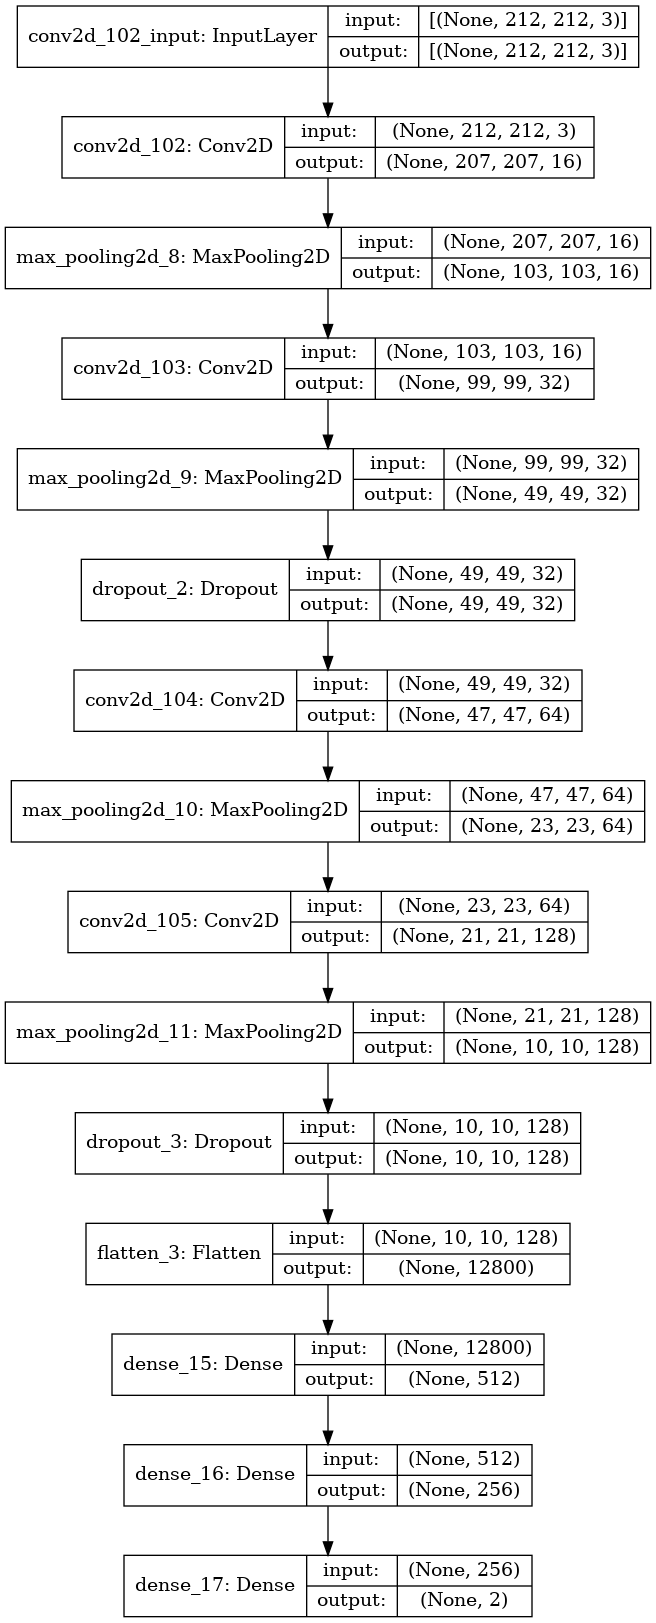

In [119]:
#printing and saving the model summary and architecture
summary = model.summary()
tf.keras.utils.plot_model(model, to_file="model_plot3.png", 
                          show_shapes=True, show_layer_names=True)

In [120]:
#creating a checkpoint to save the best model
checkpoint = ModelCheckpoint("best_model3.h5", 
                             monitor = "val_loss",
                             verbose = 0, 
                             save_best_only = True, 
                             mode = "auto")
#Specifying an earlystopping to avoid overfitting
stopping = EarlyStopping(monitor = "val_loss",
                         patience = 10,#after this many epochs,stop the model training
                         verbose = 0,
                         mode = "auto")

In [121]:
#compliling the model 
model.compile(
loss="categorical_crossentropy",
optimizer=Adam(learning_rate=0.001),
metrics=["accuracy"])


In [162]:
# model fitting
hist = model.fit(train_generator, epochs = 10, validation_data=valid_generator, 
                callbacks = [checkpoint, stopping])

# epochs=30

#To avoid retraing the model again, we will upload the downloded model 
#loadig the trained model
# model = tf.keras.models.load_model("../input/mymodel/best_model3.h5")

Epoch 1/10
400/400 [==============================] - 57s 143ms/step - loss: 0.1774 - accuracy: 0.9340 - val_loss: 0.1505 - val_accuracy: 0.9488
Epoch 2/10
400/400 [==============================] - 57s 142ms/step - loss: 0.1531 - accuracy: 0.9436 - val_loss: 0.2807 - val_accuracy: 0.8988
Epoch 3/10
400/400 [==============================] - 57s 142ms/step - loss: 0.1279 - accuracy: 0.9509 - val_loss: 0.2286 - val_accuracy: 0.9266
Epoch 4/10
400/400 [==============================] - 57s 143ms/step - loss: 0.1064 - accuracy: 0.9605 - val_loss: 0.3747 - val_accuracy: 0.8703
Epoch 5/10
400/400 [==============================] - 58s 144ms/step - loss: 0.0896 - accuracy: 0.9670 - val_loss: 0.0570 - val_accuracy: 0.9825
Epoch 6/10
400/400 [==============================] - 58s 144ms/step - loss: 0.0780 - accuracy: 0.9713 - val_loss: 0.1258 - val_accuracy: 0.9613
Epoch 7/10
400/400 [==============================] - 57s 144ms/step - loss: 0.0603 - accuracy: 0.9764 - val_loss: 0.1854 - val_ac

The code below was used to plot the training history that has been displayed as an image in the cell after.

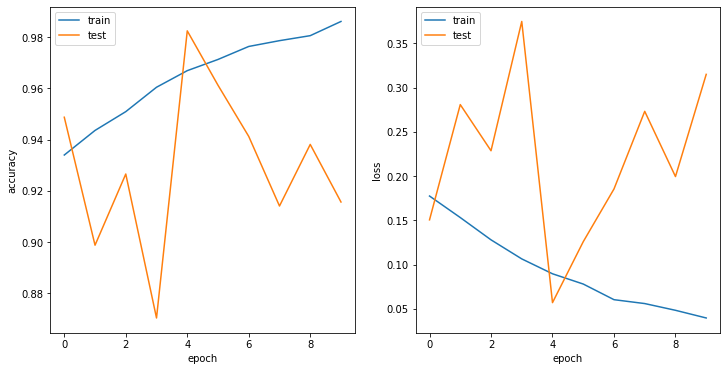

In [163]:
#creating subplots for traing plots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# summarize history for accuracy
axes[0].plot(hist.history['accuracy'])
axes[0].plot(hist.history['val_accuracy'])
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')


# summarize history for loss
axes[1].plot(hist.history['loss'])
axes[1].plot(hist.history['val_loss'])
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

# fig.title('Model Accuracy')

plt.savefig('model_Accuracy_plot.png')
plt.show()


In [125]:
# #seens the model is now preloaded we will plot
# img3= image.load_img("../input/the-model-training-graph/Screenshot from 2022-05-09 12-34-35.png")
# plt.figure(figsize=(20,10))
# plt.imshow(img3)

In [126]:
# #getting a link to dowmload the the model and the plots 
os.chdir(r"../working")
# from IPython.display import FileLink

# FileLink(r"model_Accuracy_plot.png")

# FileLink(r"model_plot3.png")

# FileLink(r"best_model3.h5")
         


### Testing the model with a new dataset not used in training

In [127]:
#Trying to obtain the rows that were not in the traing set 
#for final testing of our trained model

# we start by appening the traing datast in the whole dataframe 
#for spirals and elliptical galaxies 
df_spiral_all = new_data.append(df_spiral)
df_all = df_spiral_all.append(df_elliptical)

#drop rows which contain duplicates, Drop all duplicates.
df_test_all = df_all.drop_duplicates(keep=False)
df_test_all.shape


(8273, 39)

In [128]:
# printing the shape of the dataframe for the specific categories
print(df_test_all[df_test_all["class"] == "spiral"].shape)
print(df_test_all[df_test_all["class"] == "elliptical"].shape)

(8141, 39)
(132, 39)


In [155]:
#Preparing an equal sample of text data for the model
df_spiral_test = df_test_all[df_test_all["class"] == "spiral"].sample(n=130,
                                                                      random_state = 42)
#
df_elliptical_test = df_test_all[df_test_all["class"] == "elliptical"].sample(
    n=130, random_state = 42)

#merging the two dataframes together to make the testing dataframe
#sellecting only the galaxyid and classes colunms
frame = [df_spiral_test, df_elliptical_test]
df_test_new = pd.concat(frame)
df_test_new = df_test_new[["GalaxyID", "class"]]
df_test_new.shape


(260, 2)

In [156]:
df_test_new

,GalaxyID,class
22206,922420.jpg,spiral
1428,155242.jpg,spiral
22652,939274.jpg,spiral
12939,585646.jpg,spiral
11446,529369.jpg,spiral
...,...,...
3198,222070.jpg,elliptical
10348,487253.jpg,elliptical
13023,588859.jpg,elliptical
19616,824949.jpg,elliptical


In [159]:
#labling the test images with ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255.,
                           )

test_generator = datagen.flow_from_dataframe(dataframe = df_galaxies_test,
                                          target_size = (212,212),
                                          directory = "./images_training_rev1",
                                          batch_size = 32,
                                          x_col="GalaxyID",
                                          y_col="class",
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          shuffle=True,
                                          seed=42)

Found 1000 validated image filenames belonging to 2 classes.


In [164]:
#Printing the loss value and the accuracy for the evaluation with test data
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.09116718918085098
Test accuracy: 0.9729999899864197


In [165]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions on a test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.49      0.51      0.50       500
           1       0.49      0.46      0.47       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



## Model Visualization

In [133]:
# printing the sumary 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 207, 207, 16)      1744      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 103, 103, 16)      0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 99, 99, 32)        12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)       

#### Visualizing a disc like spiral galaxies

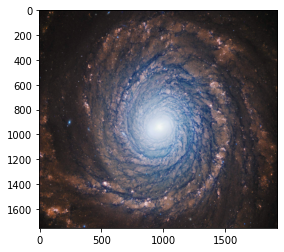

In [134]:
# uploading an image for prediction
img_upload = "/kaggle/input/demospiral/spiral.jpg"

img = image.load_img(img_upload, target_size=(212, 212))
# img.size
plt.imshow(cv2.imread(img_upload));# Visualize image

In [135]:
# image.load_img??

In [136]:
#the first class is elliptical while the second class is spiral
x = image.img_to_array(img)
# print(x)
x = np.expand_dims(x, axis=0)
# print(x)

x = preprocess_input(x)
# print(x)

#making a prediction
preds = model.predict(x)
print(preds)

[[0.14995812 0.8500419 ]]


In [138]:
# Defining a fuction that takes an input and outputs a 
#Gradient Class Activation Map for the final spacified layer
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("conv2d_105")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

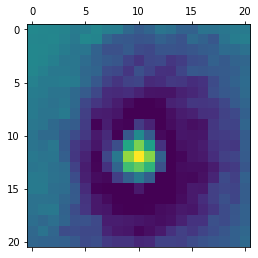

In [139]:
#visualizing the heat map

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((21, 21))
plt.matshow(heatmap)
plt.savefig("Astromomy.png")
plt.show()

In [140]:
#getting a link to dowmload the the heatmap image
os.chdir(r"../working")
from IPython.display import FileLink
FileLink(r"Astromomy.png")

/kaggle/working/Astromomy.png

#### Visualizing an elliptical galaxy

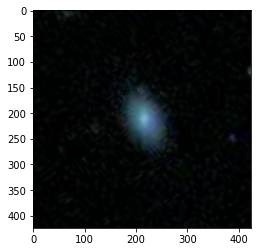

In [141]:
# uploading an image for prediction
img_upload = "/kaggle/input/images123/100018.jpg"

img = image.load_img(img_upload, target_size=(212, 212))

plt.imshow(cv2.imread(img_upload));# Visualize image

In [142]:
#the first class is elliptical while the second class is spiral
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

#making a prediction
preds = model.predict(x)
print(preds)

[[1.7106757e-05 9.9998283e-01]]


In [145]:
# Defining a fuction that takes an input and outputs a 
#Gradient Class Activation Map for the final spacified layer
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("conv2d_105")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

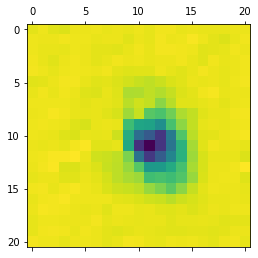

In [146]:
#visualizing the heat map

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((21, 21))
plt.matshow(heatmap)
plt.savefig("Astromomy2.png")
plt.show()

In [147]:
#getting a link to dowmload the the heatmap image
os.chdir(r"../working")
from IPython.display import FileLink
FileLink(r"Astromomy2.png")

/kaggle/working/Astromomy2.png

## Conclusion and Recommendations
### Conclusion
The model architecture seem to perform considerably well for our sample with an optimized  validation and test accuracy within the range (96 - 98)%. More augmentation is needed for the model to generalise well. However,from random image predictions and plotting the heat maps form the model, it seemed that most of the galaxies well classified as spiral galaxies were the disk like spiral galaxy type (See the first image and the corresponding image heat map in the Model Visualization). Surprisingly, galaxies with very well defined and observed arms are strongly mis-classified as elliptical. But going back to the images, it was evident that our selected sample of spriral galaxies was heavily bias towards the disk like structures. The small number of spiral galaxies were maybe consided outliers by our model.

### Recommendations
- Based on the type of galaxies classifed as spiral glaxies, it maybe important for the sample of spiral galaxies to be balanced between the two or more classifications added for an improvement in the classifications.
- The traing data could be increased by including the galaxies with a lower percentage fraction in our selection criteria.
- Linear based models can be used to compare our model perfomance with.

In [151]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions on a test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.49      0.52      0.50       130
           1       0.49      0.46      0.47       130

    accuracy                           0.49       260
   macro avg       0.49      0.49      0.49       260
weighted avg       0.49      0.49      0.49       260



In [191]:
model.save("CNN.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# > **Inception_V3**

In [166]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import preprocess_input

import numpy as np
import os




In [167]:
# Using the ImageDataGenerator to prepare the data for training
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_generator = datagen.flow_from_dataframe(dataframe=df_galaxies,
                                              target_size=(224, 224),
                                              directory="./images_training_rev1",
                                              batch_size=32,
                                              x_col="GalaxyID",
                                              y_col="class",
                                              color_mode="rgb",
                                              class_mode="categorical",
                                              subset="training",
                                              shuffle=True,
                                              seed=42)

valid_generator = datagen.flow_from_dataframe(dataframe=df_galaxies,
                                              target_size=(224, 224),
                                              directory="./images_training_rev1",
                                              batch_size=32,
                                              x_col="GalaxyID",
                                              y_col="class",
                                              color_mode="rgb",
                                              class_mode="categorical",
                                              subset="validation",
                                              shuffle=True,
                                              seed=42)


Found 12800 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.


In [168]:
# Define the Inception V3 pretrained model
pretrained_model = tf.keras.applications.InceptionV3(include_top=False,
                                                     weights='imagenet',
                                                     input_shape=(224, 224, 3))
pretrained_model.trainable = False

# Construct the CNN model architecture
model = tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Creating a checkpoint to save the best model
checkpoint = ModelCheckpoint("best_model.h5",
                             monitor="val_loss",
                             verbose=0,
                             save_best_only=True,
                             mode="auto")

# Specifying an early stopping to avoid overfitting
stopping = EarlyStopping(monitor="val_loss",
                         patience=10,
                         verbose=0,
                         mode="auto")

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])



In [169]:
# Train the model
hist = model.fit(train_generator,
                 epochs=10,
                 validation_data=valid_generator,
                 callbacks=[checkpoint, stopping])


Epoch 1/10
400/400 [==============================] - 74s 175ms/step - loss: 0.4759 - accuracy: 0.9147 - val_loss: 0.1828 - val_accuracy: 0.9294
Epoch 2/10
400/400 [==============================] - 68s 169ms/step - loss: 0.1359 - accuracy: 0.9527 - val_loss: 0.1390 - val_accuracy: 0.9581
Epoch 3/10
400/400 [==============================] - 66s 164ms/step - loss: 0.1005 - accuracy: 0.9630 - val_loss: 0.1502 - val_accuracy: 0.9509
Epoch 4/10
400/400 [==============================] - 69s 172ms/step - loss: 0.0828 - accuracy: 0.9691 - val_loss: 0.1340 - val_accuracy: 0.9547
Epoch 5/10
400/400 [==============================] - 66s 166ms/step - loss: 0.0630 - accuracy: 0.9760 - val_loss: 0.1246 - val_accuracy: 0.9578
Epoch 6/10
400/400 [==============================] - 66s 166ms/step - loss: 0.0526 - accuracy: 0.9812 - val_loss: 0.4889 - val_accuracy: 0.8816
Epoch 7/10
400/400 [==============================] - 65s 163ms/step - loss: 0.0467 - accuracy: 0.9827 - val_loss: 0.1547 - val_ac

In [171]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7214512825012207
Test accuracy: 0.8209999799728394


In [170]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions on a test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.49      0.33      0.39       500
           1       0.49      0.66      0.57       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.48      1000
weighted avg       0.49      0.49      0.48      1000



In [192]:
model.save("InceptionV3.h5")

# > **VGG16**

In [172]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import tensorflow.keras.backend as K
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16

import numpy as np
import os

# Using the ImageDataGenerator to prepare the data for training
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             validation_split=0.2)

train_generator = datagen.flow_from_dataframe(dataframe=df_galaxies,
                                              target_size=(224, 224),
                                              directory="./images_training_rev1",
                                              batch_size=32,
                                              x_col="GalaxyID",
                                              y_col="class",
                                              color_mode="rgb",
                                              class_mode="categorical",
                                              subset="training",
                                              shuffle=True,
                                              seed=42)

valid_generator = datagen.flow_from_dataframe(dataframe=df_galaxies,
                                              target_size=(224, 224),
                                              directory="./images_training_rev1",
                                              batch_size=32,
                                              x_col="GalaxyID",
                                              y_col="class",
                                              color_mode="rgb",
                                              class_mode="categorical",
                                              subset="validation",
                                              shuffle=True,
                                              seed=42)

# Define the VGG16 pretrained model
pretrained_model = VGG16(include_top=False,
                         weights='imagenet',
                         input_shape=(224, 224, 3))
pretrained_model.trainable = False

# Construct the CNN model architecture
model = tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Creating a checkpoint to save the best model
checkpoint = ModelCheckpoint("best_model.h5",
                             monitor="val_loss",
                             verbose=0,
                             save_best_only=True,
                             mode="auto")

# Specifying an early stopping to avoid overfitting
stopping = EarlyStopping(monitor="val_loss",
                         patience=10,
                         verbose=0,
                         mode="auto")

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Train the model
hist = model.fit(train_generator,
                 epochs=10,
                 validation_data=valid_generator,
                 callbacks=[checkpoint, stopping])


Found 12800 validated image filenames belonging to 2 classes.
Found 3200 validated image filenames belonging to 2 classes.
Epoch 1/10
400/400 [==============================] - 79s 195ms/step - loss: 0.6715 - accuracy: 0.9016 - val_loss: 0.2781 - val_accuracy: 0.8922
Epoch 2/10
400/400 [==============================] - 78s 196ms/step - loss: 0.1338 - accuracy: 0.9537 - val_loss: 0.2383 - val_accuracy: 0.9316
Epoch 3/10
400/400 [==============================] - 78s 194ms/step - loss: 0.0779 - accuracy: 0.9705 - val_loss: 0.1829 - val_accuracy: 0.9463
Epoch 4/10
400/400 [==============================] - 79s 196ms/step - loss: 0.0518 - accuracy: 0.9795 - val_loss: 0.2294 - val_accuracy: 0.9372
Epoch 5/10
400/400 [==============================] - 79s 198ms/step - loss: 0.0358 - accuracy: 0.9862 - val_loss: 0.3792 - val_accuracy: 0.9334
Epoch 6/10
400/400 [==============================] - 78s 195ms/step - loss: 0.0418 - accuracy: 0.9858 - val_loss: 0.5002 - val_accuracy: 0.8909
Epoch 7

In [178]:
test_generator = datagen.flow_from_dataframe(dataframe=df_galaxies_test,
                                              target_size=(224, 224),
                                              directory="./images_training_rev1",
                                              batch_size=32,
                                              x_col="GalaxyID",
                                              y_col="class",
                                              color_mode="rgb",
                                              class_mode="categorical",
                                              shuffle=True,
                                              seed=42)

Found 1000 validated image filenames belonging to 2 classes.


In [179]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.37290897965431213
Test accuracy: 0.9319999814033508


In [180]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions on a test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.50      0.57      0.53       500
           1       0.50      0.43      0.46       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



In [193]:
model.save("vgg16.h5")

# **RESNET**

In [181]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Pretrained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(212, 212, 3))

# Freeze the base model
base_model.trainable = False

# Add your own classification layers on top
model = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# ... Rest of the code (ImageDataGenerator, checkpoint, stopping, compilation, etc.) ...


In [182]:

# Creating a checkpoint to save the best model
checkpoint = ModelCheckpoint("best_model.h5",
                             monitor="val_loss",
                             verbose=0,
                             save_best_only=True,
                             mode="auto")

# Specifying an early stopping to avoid overfitting
stopping = EarlyStopping(monitor="val_loss",
                         patience=10,
                         verbose=0,
                         mode="auto")

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Train the model
hist = model.fit(train_generator,
                 epochs=10,
                 validation_data=valid_generator,
                 callbacks=[checkpoint, stopping])

Epoch 1/10
400/400 [==============================] - 80s 192ms/step - loss: 0.2198 - accuracy: 0.9137 - val_loss: 0.2259 - val_accuracy: 0.9128


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
400/400 [==============================] - 77s 193ms/step - loss: 0.1441 - accuracy: 0.9413 - val_loss: 0.2297 - val_accuracy: 0.9047
Epoch 3/10
400/400 [==============================] - 77s 191ms/step - loss: 0.1253 - accuracy: 0.9534 - val_loss: 0.2008 - val_accuracy: 0.9353
Epoch 4/10
400/400 [==============================] - 77s 193ms/step - loss: 0.1167 - accuracy: 0.9567 - val_loss: 0.1260 - val_accuracy: 0.9544
Epoch 5/10
400/400 [==============================] - 78s 194ms/step - loss: 0.1072 - accuracy: 0.9584 - val_loss: 0.1078 - val_accuracy: 0.9619
Epoch 6/10
400/400 [==============================] - 76s 191ms/step - loss: 0.0971 - accuracy: 0.9618 - val_loss: 0.3028 - val_accuracy: 0.8797
Epoch 7/10
400/400 [==============================] - 76s 191ms/step - loss: 0.0916 - accuracy: 0.9664 - val_loss: 0.3327 - val_accuracy: 0.8750
Epoch 8/10
400/400 [==============================] - 76s 190ms/step - loss: 0.0843 - accuracy: 0.9684 - val_loss: 0.1138 - val_ac

In [183]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions on a test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes)
print(report)


              precision    recall  f1-score   support

           0       0.48      0.48      0.48       500
           1       0.49      0.49      0.49       500

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



In [184]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09002946317195892
Test accuracy: 0.9649999737739563


In [185]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions on a test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.51      0.50      0.50       500
           1       0.50      0.51      0.51       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000



In [194]:
model.save("Resnet50.h5")

# **Xception**

In [186]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D

# Pretrained model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(212, 212, 3))

# Freeze the base model
base_model.trainable = False

# Add your own classification layers on top
model = tf.keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])




In [187]:

# Creating a checkpoint to save the best model
checkpoint = ModelCheckpoint("best_model.h5",
                             monitor="val_loss",
                             verbose=0,
                             save_best_only=True,
                             mode="auto")

# Specifying an early stopping to avoid overfitting
stopping = EarlyStopping(monitor="val_loss",
                         patience=10,
                         verbose=0,
                         mode="auto")

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Train the model
hist = model.fit(train_generator,
                 epochs=10,
                 validation_data=valid_generator,
                 callbacks=[checkpoint, stopping])

Epoch 1/10
400/400 [==============================] - 83s 200ms/step - loss: 0.7609 - accuracy: 0.7624 - val_loss: 0.1553 - val_accuracy: 0.9581


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
400/400 [==============================] - 79s 198ms/step - loss: 0.3719 - accuracy: 0.8409 - val_loss: 0.4807 - val_accuracy: 0.7856
Epoch 3/10
400/400 [==============================] - 79s 199ms/step - loss: 0.3421 - accuracy: 0.8536 - val_loss: 0.4719 - val_accuracy: 0.7872
Epoch 4/10
400/400 [==============================] - 78s 196ms/step - loss: 0.3087 - accuracy: 0.8684 - val_loss: 0.2616 - val_accuracy: 0.8994
Epoch 5/10
400/400 [==============================] - 79s 197ms/step - loss: 0.3064 - accuracy: 0.8746 - val_loss: 1.0491 - val_accuracy: 0.5350
Epoch 6/10
400/400 [==============================] - 78s 195ms/step - loss: 0.3025 - accuracy: 0.8746 - val_loss: 0.1571 - val_accuracy: 0.9488
Epoch 7/10
400/400 [==============================] - 78s 195ms/step - loss: 0.2961 - accuracy: 0.8759 - val_loss: 0.1679 - val_accuracy: 0.9438
Epoch 8/10
400/400 [==============================] - 79s 196ms/step - loss: 0.3024 - accuracy: 0.8732 - val_loss: 0.5685 - val_ac

In [188]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions on a test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes)
print(report)


              precision    recall  f1-score   support

           0       0.49      0.44      0.46       500
           1       0.49      0.54      0.51       500

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



In [189]:
score = model.evaluate(test_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.28377655148506165
Test accuracy: 0.890999972820282


In [190]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions on a test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.51      0.46      0.48       500
           1       0.51      0.56      0.53       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



In [195]:
model.save("Xception.h5")